<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-the-clean-dataset" data-toc-modified-id="Importing-the-clean-dataset-1">Importing the clean dataset</a></span></li><li><span><a href="#Question-3" data-toc-modified-id="Question-3-2">Question 3</a></span><ul class="toc-item"><li><span><a href="#List-of-all-unique-accounts" data-toc-modified-id="List-of-all-unique-accounts-2.1">List of all unique accounts</a></span></li><li><span><a href="#Average-Memory-Used-and-Average-Memory-Requested-Per-Account" data-toc-modified-id="Average-Memory-Used-and-Average-Memory-Requested-Per-Account-2.2">Average Memory Used and Average Memory Requested Per Account</a></span></li></ul></li><li><span><a href="#Question-4" data-toc-modified-id="Question-4-3">Question 4</a></span></li><li><span><a href="#Requested-Time" data-toc-modified-id="Requested-Time-4">Requested Time</a></span><ul class="toc-item"><li><span><a href="#Remarks" data-toc-modified-id="Remarks-4.1">Remarks</a></span></li></ul></li><li><span><a href="#Used-Time" data-toc-modified-id="Used-Time-5">Used Time</a></span></li><li><span><a href="#Used-Mb-Per-Core" data-toc-modified-id="Used-Mb-Per-Core-6">Used Mb Per Core</a></span></li><li><span><a href="#Requested-Time-vs-Used-Time" data-toc-modified-id="Requested-Time-vs-Used-Time-7">Requested Time vs Used Time</a></span></li><li><span><a href="#Requested-Memory-vs-Used-Memory" data-toc-modified-id="Requested-Memory-vs-Used-Memory-8">Requested Memory vs Used Memory</a></span></li></ul></div>

## Importing the clean dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
accre_jobs_2020 = pd.read_csv('../data/accre_jobs_2020_cleaned.csv')
accre_jobs_2020.head()

,jobid,account,user,reqtime,usedtime,nodes,cpus,partition,state,exitcode_user,exitcode_error,used_mb_per_core,reqmem_per_core,cluster_type,cluster_nodes
0,15925210,treviso,arabella,1188000,1188028,1,24,production,COMPLETED,0,0,2748.895417,5120.0,cn,1531
1,15861126,treviso,arabella,1188000,1090256,1,24,production,COMPLETED,0,0,2799.213333,5120.0,cn,1441
2,15861125,treviso,arabella,1188000,1188020,1,24,production,COMPLETED,0,0,2879.660833,5120.0,cn,1464
3,16251645,treviso,arabella,1188000,1050632,1,24,production,COMPLETED,0,0,2721.555417,5120.0,cn,1473
4,16251646,treviso,arabella,1188000,1188003,1,24,production,COMPLETED,0,0,2744.837917,5120.0,cn,1440


In [4]:
accre_jobs_2020 = accre_jobs_2020[(accre_jobs_2020['exitcode_user'] == 0) & (accre_jobs_2020['exitcode_error'] == 0) & (accre_jobs_2020['state'] == 'COMPLETED') & (accre_jobs_2020['partition'] == 'production') & (accre_jobs_2020['used_mb_per_core'] != 0)]

Let's have a quick peek at the info for this dataset

In [5]:
accre_jobs_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2765225 entries, 0 to 3813159
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   jobid             object 
 1   account           object 
 2   user              object 
 3   reqtime           int64  
 4   usedtime          int64  
 5   nodes             int64  
 6   cpus              int64  
 7   partition         object 
 8   state             object 
 9   exitcode_user     int64  
 10  exitcode_error    int64  
 11  used_mb_per_core  float64
 12  reqmem_per_core   float64
 13  cluster_type      object 
 14  cluster_nodes     object 
dtypes: float64(2), int64(6), object(7)
memory usage: 337.6+ MB


---

## Question 3

**What groups (accounts) are best at optimizing their memory usage in terms of percent of actual memory used of the memory requested for a job? What is the average percent for each group (account)?**

### List of all unique accounts

In [6]:
len(accre_jobs_2020["account"].unique())

132

### Average Memory Used and Average Memory Requested Per Account

In [7]:
# Average memory used and Average Memory Requested Per Account
memories_df = accre_jobs_2020.groupby("account")[["used_mb_per_core", "reqmem_per_core"]].agg(np.mean)
memories_df.columns = ["avg_used_mb_per_core", "avg_reqmem_per_core"]

# Percentage of Average memory used over Average Memory Requested Per Account
memories_df.loc[:, "pct_mem_used_req_per_account"] = (memories_df.loc[:,"avg_used_mb_per_core"] / memories_df.loc[:,"avg_reqmem_per_core"]) * 100

# Sorting
memories_df.sort_values(by="pct_mem_used_req_per_account", ascending=False)

,avg_used_mb_per_core,avg_reqmem_per_core,pct_mem_used_req_per_account
account,,,
medium,9398.891179,13635.852650,68.927785
strawberries,12094.675179,17973.841270,67.290431
antares,2038.723361,3072.000000,66.364693
shell,2529.188636,4096.000000,61.747769
shiny,1945.737579,3262.906512,59.632036
jicama,13427.270930,22990.560847,58.403407
texas,2454.685164,4262.360524,57.589806
shallots,2918.237212,5419.165275,53.850308
roasted,9204.343160,17169.608466,53.608346


We don't have enough information to classify each account into its appropriate group that it belongs to. So we are unable to calculate the average for each group. 

Let's define **best** as the top 30. The best 30 accounts are:

In [8]:
memories_df.nlargest(30, "pct_mem_used_req_per_account")

,avg_used_mb_per_core,avg_reqmem_per_core,pct_mem_used_req_per_account
account,,,
medium,9398.891179,13635.852650,68.927785
strawberries,12094.675179,17973.841270,67.290431
antares,2038.723361,3072.000000,66.364693
shell,2529.188636,4096.000000,61.747769
shiny,1945.737579,3262.906512,59.632036
jicama,13427.270930,22990.560847,58.403407
texas,2454.685164,4262.360524,57.589806
shallots,2918.237212,5419.165275,53.850308
roasted,9204.343160,17169.608466,53.608346


Let's put them on a barplot

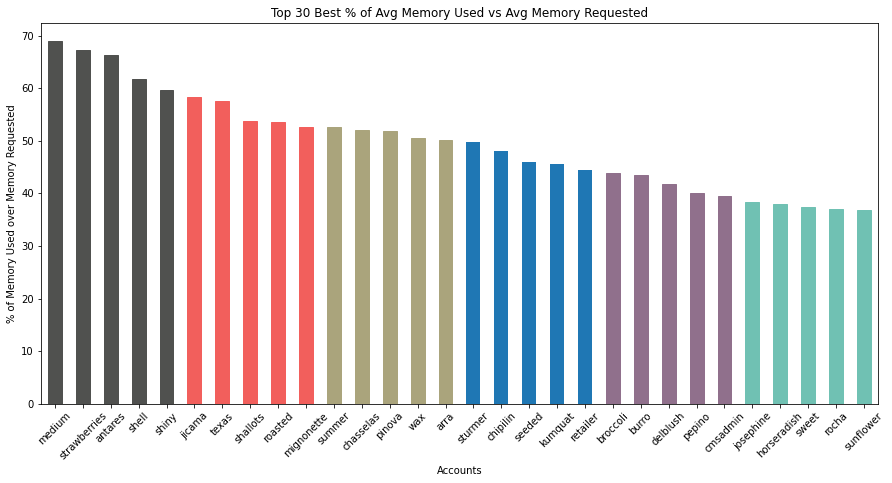

In [78]:
plot_1 = memories_df.nlargest(30, "pct_mem_used_req_per_account")[["pct_mem_used_req_per_account"]].plot(
    kind="bar", 
    legend=None,
    title="Top 30 Best % of Avg Memory Used vs Avg Memory Requested",
    xlabel="Accounts",
    ylabel="% of Memory Used over Memory Requested",
    figsize=(15,7),
    rot=45
)
for n in range(0,5):
    plot_1.get_children()[n].set_color('#50514F')
for n in range(5,10):
    plot_1.get_children()[n].set_color('#F25F5C')
for n in range(10,15):
    plot_1.get_children()[n].set_color('#AAA47C')
# for n in range(15,20):
#     plot_1.get_children()[n].set_color('#cd6873')
for n in range(20,25):
    plot_1.get_children()[n].set_color('#90708C')
for n in range(25,30):
    plot_1.get_children()[n].set_color('#70C1B3')

**What if we just want to see the scatter plot of all accounts' average used memory vs requested memory?**

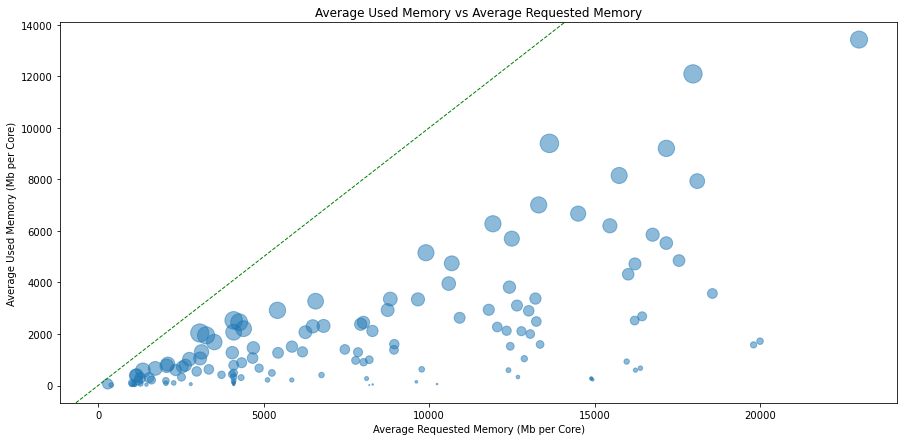

In [80]:
fig, ax = plt.subplots(figsize=(15,7))

ax.scatter(
    memories_df["avg_reqmem_per_core"], 
    memories_df["avg_used_mb_per_core"], 
    s=memories_df["pct_mem_used_req_per_account"] * 5, 
    alpha=0.5
)

ax.axline((0, 0), (10, 10), linewidth=1, color='g', ls="--")

plt.title("Average Used Memory vs Average Requested Memory")
plt.ylabel("Average Used Memory (Mb per Core)")
plt.xlabel("Average Requested Memory (Mb per Core)");

**Now, let's just look at the top 30 accounts**

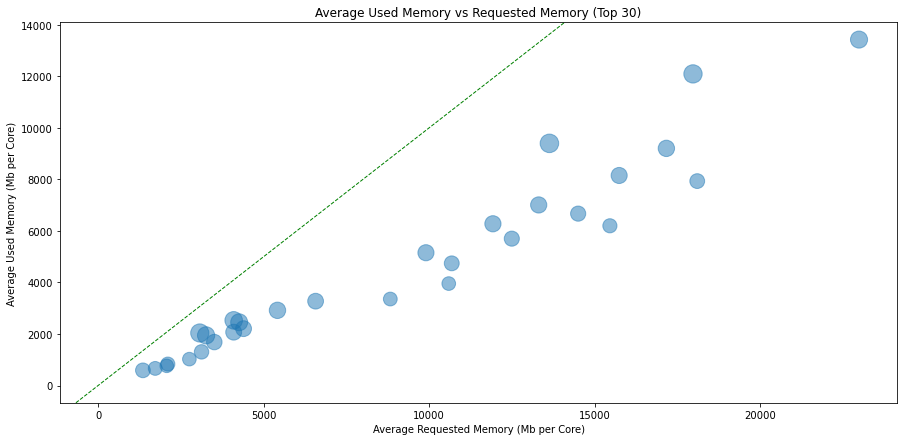

In [81]:
fig, ax = plt.subplots(figsize=(15,7))

ax.scatter(
    memories_df.nlargest(30, "pct_mem_used_req_per_account")["avg_reqmem_per_core"], 
    memories_df.nlargest(30, "pct_mem_used_req_per_account")["avg_used_mb_per_core"], 
    s=memories_df.nlargest(30, "pct_mem_used_req_per_account")["pct_mem_used_req_per_account"] * 5, 
    alpha=0.5
)

ax.axline((0, 0), (10, 10), linewidth=1, color='g', ls="--")

plt.title("Average Used Memory vs Requested Memory (Top 30)")
plt.ylabel("Average Used Memory (Mb per Core)")
plt.xlabel("Average Requested Memory (Mb per Core)");

---

## Question 4

**Optimizing memory is more important for longer running jobs then shorter running jobs as the resources are tied up for longer. If jobs are weighted by runtime, what is the average percent of memory used of the requested memory for each group (account)?**

- Optimizing memory = `used_mb_per_core` should be as little as possible
- We are focusing on longer running jobs: `usedtime`
- Weighted by runtime: `usedtime`

- What do we want to do? -- We want to optimize memory
- What is the population concerned? -- Longer running jobs
  - What defines a "longer running job"?
  - Define a demarcation line
- How to analyze?
  - Weight jobs by their runtime (`usedtime`)
  - What is the proportion of (memory used) / (requested memory)?

Weighted Average:

- Focus on Production only
- Create a new column: `pct_mem_used_req_per_account`
- This was taken care of in **question 3**

$$MemoryUsedPercent = \frac{MemoryUsed}{MemoryRequested} \times 100$$

- Now, we can weight it by runtime of each job
- Runtime per job divided by the total runtime of the account

General Formula for Weighted Average:

$$WeightedAverage = \frac{\sum (number \times weight)}{\sum weights}$$

In our case, we want to have the Runtime-Weighted average of the proportion of the memory used over the requested memory, so:

$$MemoryUsedRuntimeWeightedAverage_{account} = \frac{\sum (\frac{MemoryUsed_{job}}{MemoryRequested_{job}} \times Runtime_{job})}{\sum Runtime_{account}}$$

Where $job$ is a job performed by the account

In [12]:
# Quick look of what we are working with
accre_jobs_2020.shape

(2765225, 15)

In [13]:
accre_jobs_2020.head()

,jobid,account,user,reqtime,usedtime,nodes,cpus,partition,state,exitcode_user,exitcode_error,used_mb_per_core,reqmem_per_core,cluster_type,cluster_nodes
0,15925210,treviso,arabella,1188000,1188028,1,24,production,COMPLETED,0,0,2748.895417,5120.0,cn,1531
1,15861126,treviso,arabella,1188000,1090256,1,24,production,COMPLETED,0,0,2799.213333,5120.0,cn,1441
2,15861125,treviso,arabella,1188000,1188020,1,24,production,COMPLETED,0,0,2879.660833,5120.0,cn,1464
3,16251645,treviso,arabella,1188000,1050632,1,24,production,COMPLETED,0,0,2721.555417,5120.0,cn,1473
4,16251646,treviso,arabella,1188000,1188003,1,24,production,COMPLETED,0,0,2744.837917,5120.0,cn,1440


In [14]:
accre_jobs_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2765225 entries, 0 to 3813159
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   jobid             object 
 1   account           object 
 2   user              object 
 3   reqtime           int64  
 4   usedtime          int64  
 5   nodes             int64  
 6   cpus              int64  
 7   partition         object 
 8   state             object 
 9   exitcode_user     int64  
 10  exitcode_error    int64  
 11  used_mb_per_core  float64
 12  reqmem_per_core   float64
 13  cluster_type      object 
 14  cluster_nodes     object 
dtypes: float64(2), int64(6), object(7)
memory usage: 337.6+ MB


In [15]:
# Only looking at the following
#state = completed
#memory usage > 0
#exitcode = 0:0
#partition = production

accre_jobs_2020 = accre_jobs_2020[accre_jobs_2020["state"] == "COMPLETED"]
accre_jobs_2020 = accre_jobs_2020[accre_jobs_2020["used_mb_per_core"] > 0]
accre_jobs_2020 = accre_jobs_2020[accre_jobs_2020["exitcode_user"] == 0]
accre_jobs_2020 = accre_jobs_2020[accre_jobs_2020["exitcode_error"] == 0]
accre_jobs_2020 = accre_jobs_2020[accre_jobs_2020["partition"] == "production"]

accre_jobs_2020.shape

(2765225, 15)

**What is the total jobs runtime for each account? ($\sum Runtime_{account}$) `sum_runtime_account`**

In [16]:
# Total Runtime Per Account
accounts_sum_runtime_df = accre_jobs_2020.groupby("account")[["usedtime"]].agg(sum)
accounts_sum_runtime_df.columns = ["sum_runtime_account"]
# Flatten the dataset
accounts_sum_runtime_df = accounts_sum_runtime_df.sort_values(by="sum_runtime_account", ascending=False).reset_index()
accounts_sum_runtime_df

,account,sum_runtime_account
0,cms,10976817483
1,cep,10338187960
2,carrot,4065427989
3,cms_lowprio,3135081543
4,wood,2586474922
5,galia,1942825416
6,regal,1820333305
7,garlic,1811159478
8,portabella,1706189787
9,sweet,1440439151


**We also need to find the first-part of the numerator: $$\frac{MemoryUsed_{job}}{MemoryRequested_{job}} \times Runtime_{job}$$ on a per-job basis first**

In [17]:
# First, let's get it on a per job basis and add it to the dataframe
accre_jobs_2020["memory_usage_runtime_weighted"] = (accre_jobs_2020["used_mb_per_core"] / accre_jobs_2020["reqmem_per_core"]) * accre_jobs_2020["usedtime"]
accre_jobs_2020

,jobid,account,user,reqtime,usedtime,nodes,cpus,partition,state,exitcode_user,exitcode_error,used_mb_per_core,reqmem_per_core,cluster_type,cluster_nodes,memory_usage_runtime_weighted
0,15925210,treviso,arabella,1188000,1188028,1,24,production,COMPLETED,0,0,2748.895417,5120.0,cn,1531,637844.672670
1,15861126,treviso,arabella,1188000,1090256,1,24,production,COMPLETED,0,0,2799.213333,5120.0,cn,1441,596066.236708
2,15861125,treviso,arabella,1188000,1188020,1,24,production,COMPLETED,0,0,2879.660833,5120.0,cn,1464,668182.551410
3,16251645,treviso,arabella,1188000,1050632,1,24,production,COMPLETED,0,0,2721.555417,5120.0,cn,1473,558467.423930
4,16251646,treviso,arabella,1188000,1188003,1,24,production,COMPLETED,0,0,2744.837917,5120.0,cn,1440,636889.781155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813155,24173815_6,portabella,vennie,86400,96,1,2,production,COMPLETED,0,0,11634.540000,16384.0,cn,432,68.171133
3813156,24173815_7,portabella,vennie,86400,97,1,2,production,COMPLETED,0,0,10439.905000,16384.0,cn,440,61.808520
3813157,24173815_8,portabella,vennie,86400,147,1,2,production,COMPLETED,0,0,15021.340000,16384.0,cn,312,134.773986
3813158,24173815_9,portabella,vennie,86400,147,1,2,production,COMPLETED,0,0,15533.875000,16384.0,cn,312,139.372536


**Now, we need to group those on a per-account basis with a sum**: `sum_memory_runtime_weighted_account` 

$$\sum (\frac{MemoryUsed_{job}}{MemoryRequested_{job}} \times Runtime_{job})$$

In [18]:
# Calculate the column based on the above formula
accounts_memory_runtime_weighted_df = accre_jobs_2020.groupby("account")[["memory_usage_runtime_weighted"]].agg(sum)

# Rename the column
accounts_memory_runtime_weighted_df.columns = ["sum_memory_runtime_weighted_account"]

# Flatten the dataset
accounts_memory_runtime_weighted_df = accounts_memory_runtime_weighted_df.sort_values(by="sum_memory_runtime_weighted_account", ascending=False).reset_index()
accounts_memory_runtime_weighted_df

,account,sum_memory_runtime_weighted_account
0,cms,4.485150e+09
1,cep,3.480025e+09
2,carrot,1.849202e+09
3,cms_lowprio,1.497468e+09
4,galia,7.358627e+08
5,summer,5.467305e+08
6,sweet,5.242090e+08
7,garlic,5.089936e+08
8,wax,4.248304e+08
9,fresh,3.663817e+08


**Now, we can merge the 2 dataframes: `accounts_memory_runtime_weighted_df` and `accounts_sum_runtime_df` on `account`**

In [19]:
merged_df = accounts_memory_runtime_weighted_df.merge(accounts_sum_runtime_df, on="account")
merged_df

,account,sum_memory_runtime_weighted_account,sum_runtime_account
0,cms,4.485150e+09,10976817483
1,cep,3.480025e+09,10338187960
2,carrot,1.849202e+09,4065427989
3,cms_lowprio,1.497468e+09,3135081543
4,galia,7.358627e+08,1942825416
5,summer,5.467305e+08,987548787
6,sweet,5.242090e+08,1440439151
7,garlic,5.089936e+08,1811159478
8,wax,4.248304e+08,817139939
9,fresh,3.663817e+08,711551441


**Finally, we can do the final division of both sums:**

$$MemoryUsedRuntimeWeightedAverage_{account} = \frac{\sum (\frac{MemoryUsed_{job}}{MemoryRequested_{job}} \times Runtime_{job})}{\sum Runtime_{account}}$$

**To make into percentage, we will multiply this final proportion by 100**

In [20]:
merged_df["mem_used_runtime_weighted_avg_pct"] = (merged_df["sum_memory_runtime_weighted_account"] / merged_df["sum_runtime_account"]) * 100
merged_df

,account,sum_memory_runtime_weighted_account,sum_runtime_account,mem_used_runtime_weighted_avg_pct
0,cms,4.485150e+09,10976817483,40.860207
1,cep,3.480025e+09,10338187960,33.661851
2,carrot,1.849202e+09,4065427989,45.486027
3,cms_lowprio,1.497468e+09,3135081543,47.764877
4,galia,7.358627e+08,1942825416,37.875906
5,summer,5.467305e+08,987548787,55.362381
6,sweet,5.242090e+08,1440439151,36.392304
7,garlic,5.089936e+08,1811159478,28.103192
8,wax,4.248304e+08,817139939,51.989919
9,fresh,3.663817e+08,711551441,51.490548


**Similar to previous question, let's look at the top 30**

In [21]:
top_30_mem_used_runtime_weighted = merged_df.nlargest(30, "mem_used_runtime_weighted_avg_pct")

# Make the account column into the index
top_30_mem_used_runtime_weighted = top_30_mem_used_runtime_weighted.set_index(top_30_mem_used_runtime_weighted["account"])
top_30_mem_used_runtime_weighted = top_30_mem_used_runtime_weighted.drop("account", axis=1)
top_30_mem_used_runtime_weighted

,sum_memory_runtime_weighted_account,sum_runtime_account,mem_used_runtime_weighted_avg_pct
account,,,
jicama,1.776044e+07,22168100,80.117124
bibb,1.113328e+06,1625772,68.479948
strawberries,1.384264e+06,2037194,67.949519
antares,2.840911e+05,421801,67.351935
pepino,6.462772e+06,9603783,67.294021
chasselas,2.526262e+07,38057072,66.380879
roasted,4.599244e+05,703432,65.382929
texas,4.868456e+07,75070228,64.852026
shell,1.620047e+06,2594342,62.445406


Let's also put them on a barplot

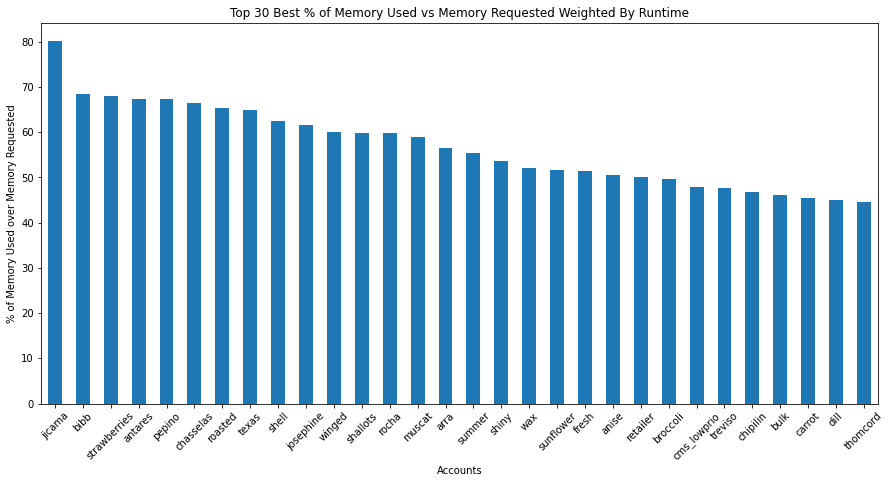

In [22]:
plot_2 = top_30_mem_used_runtime_weighted[["mem_used_runtime_weighted_avg_pct"]].plot(
    kind="bar", 
    legend=None,
    title="Top 30 Best % of Memory Used vs Memory Requested Weighted By Runtime",
    xlabel="Accounts",
    ylabel="% of Memory Used over Memory Requested",
    figsize=(15,7),
    rot=45
)

plot_2;

There are quite some shift in the order when we compare it to the original deducation we had from the previous question. **We could add these accounts' original number from question 3 and show a comparison of why the weights matter**

In [23]:
top_30_mem_used_runtime_weighted_merged = top_30_mem_used_runtime_weighted.merge(memories_df, how="left", on="account")
top_30_mem_used_runtime_weighted_merged = top_30_mem_used_runtime_weighted_merged.drop([
    "sum_memory_runtime_weighted_account", 
    "sum_runtime_account", 
    "avg_reqmem_per_core",
    "avg_used_mb_per_core"
], axis=1)
top_30_mem_used_runtime_weighted_merged

,mem_used_runtime_weighted_avg_pct,pct_mem_used_req_per_account
account,,
jicama,80.117124,58.403407
bibb,68.479948,24.525757
strawberries,67.949519,67.290431
antares,67.351935,66.364693
pepino,67.294021,40.091424
chasselas,66.380879,52.026674
roasted,65.382929,53.608346
texas,64.852026,57.589806
shell,62.445406,61.747769


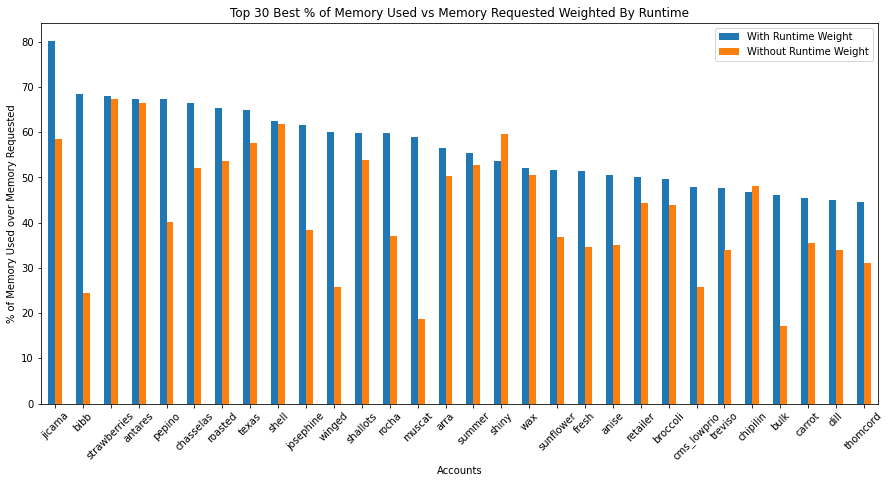

In [24]:
plot_3 = top_30_mem_used_runtime_weighted_merged.plot(
    kind="bar",
    legend=None,
    title="Top 30 Best % of Memory Used vs Memory Requested Weighted By Runtime",
    xlabel="Accounts",
    ylabel="% of Memory Used over Memory Requested",
    figsize=(15,7),
    rot=45
)
plt.legend(["With Runtime Weight", "Without Runtime Weight"])
plot_3;

---

---

In [25]:
# accre_mem_use['USEDMEM*TIMESEC'] = accre_mem_use['USEDMEM_PER_CORE']*accre_mem_use['USEDTIME_SEC']
# accre_mem_use['REQMEM*TIMESEC'] = accre_mem_use['REQMEM_PER_CORE']*accre_mem_use['USEDTIME_SEC']
# accre_acct_user['%USAGE'] = accre_acct_user['USEDMEM*TIMESEC']/accre_acct_user['REQMEM*TIMESEC'] * 100

## Requested Time

In [26]:
accre_jobs_2020[['reqtime']].describe()

,reqtime
count,2.765225e+06
mean,1.093785e+05
std,1.398880e+05
min,6.000000e+01
25%,1.260000e+04
50%,7.200000e+04
75%,1.728000e+05
max,1.209600e+06


- **Range**: `[6 ... 3.15e7]`
- **IQR**: `[1.44e4 ... 1.728e5]`

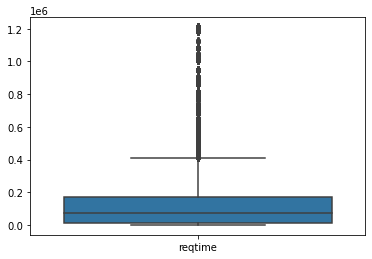

In [27]:
sns.boxplot(data=accre_jobs_2020[['reqtime']]);

**Which one is that one way out of the norm?**

In [28]:
accre_jobs_2020[accre_jobs_2020["reqtime"] > 3e7]

,jobid,account,user,reqtime,usedtime,nodes,cpus,partition,state,exitcode_user,exitcode_error,used_mb_per_core,reqmem_per_core,cluster_type,cluster_nodes,memory_usage_runtime_weighted


Looks like this computer was assigned but was left on running for a long time without doing anything. It requested 365 days and was left on running for 39.05 days. 

**Let's exclude this one from our analysis of the Requested Time**

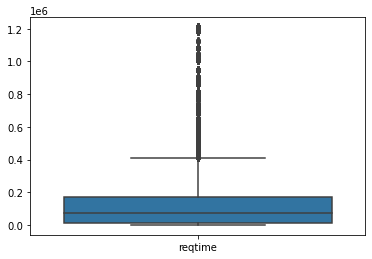

In [29]:
data_requested_time = accre_jobs_2020[accre_jobs_2020["jobid"] != "21233031"][["reqtime"]]
sns.boxplot(data=data_requested_time);

**What if we just exclude all the possible outliers aside?**

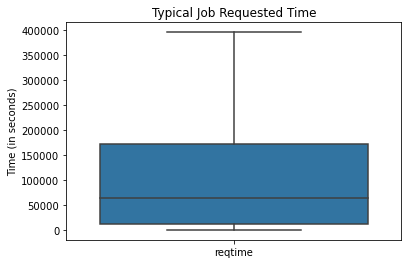

In [30]:
data_requested_time_outliers = accre_jobs_2020[accre_jobs_2020["reqtime"] > 4e5]
data_requested_time_typical = accre_jobs_2020[np.logical_not(accre_jobs_2020.isin(data_requested_time_outliers))]

sns.boxplot(data=data_requested_time_typical[["reqtime"]]).set(
    title="Typical Job Requested Time",
    ylabel="Time (in seconds)"
);

**What if we just look at the outliers by themselves?**

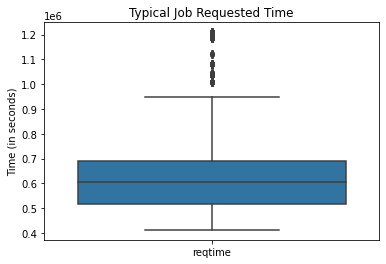

In [31]:
# Excluding that very untypical one
data_requested_time_outliers = data_requested_time_outliers[data_requested_time_outliers["reqtime"] < 3e7]

sns.boxplot(data=data_requested_time_outliers[["reqtime"]]).set(
    title="Typical Job Requested Time",
    ylabel="Time (in seconds)"
);

### Remarks

There are a lot of jobs that are taking more than 400,000s (More than 4 days) but those can be considered outliers. The typical jobs takes between 14,400s (4 hours) and 172,800s (2 days)

## Used Time

In [32]:
accre_jobs_2020[['usedtime']].describe()

,usedtime
count,2.765225e+06
mean,1.805814e+04
std,4.806568e+04
min,0.000000e+00
25%,7.110000e+02
50%,2.247000e+03
75%,1.441300e+04
max,1.713865e+06


- **Range**: `[0 ... 3.374e6]`
- **IQR**: `[1.3e2 ... 8.896e3]`

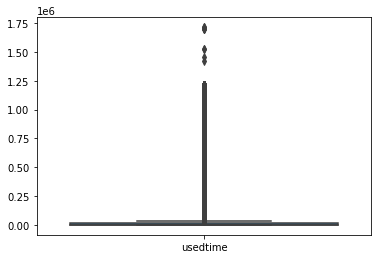

In [33]:
sns.boxplot(data=accre_jobs_2020[['usedtime']]);

## Used Mb Per Core

In [34]:
accre_jobs_2020[['used_mb_per_core']].describe()

,used_mb_per_core
count,2.765225e+06
mean,2.248674e+03
std,3.103810e+03
min,2.400000e-04
25%,2.928000e+02
50%,9.293420e+02
75%,2.583380e+03
max,9.236128e+04


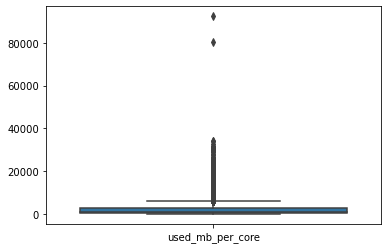

In [35]:
sns.boxplot(data=accre_jobs_2020[['used_mb_per_core']]);

## Requested Time vs Used Time

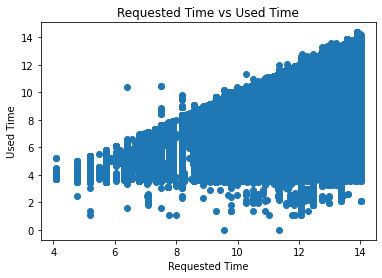

In [36]:
plt.scatter(accre_jobs_2020[['reqtime']].apply(np.log), accre_jobs_2020[['usedtime']].apply(np.log))
plt.xlabel("Requested Time")
plt.ylabel("Used Time")
plt.title("Requested Time vs Used Time");

## Requested Memory vs Used Memory

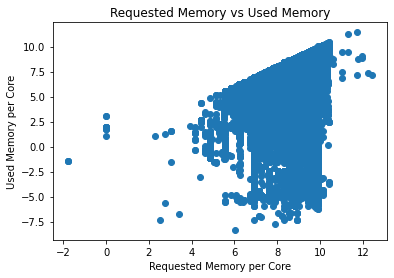

In [37]:
plt.scatter(accre_jobs_2020[['reqmem_per_core']].apply(np.log), accre_jobs_2020[['used_mb_per_core']].apply(np.log))
plt.xlabel("Requested Memory per Core")
plt.ylabel("Used Memory per Core")
plt.title("Requested Memory vs Used Memory");